In [ ]:
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


from lqg.tracking import BoundedActor

In [ ]:
T = 250

model = BoundedActor(c=100., motor_noise=0.5, sigma=6., prop_noise=2., T=T)

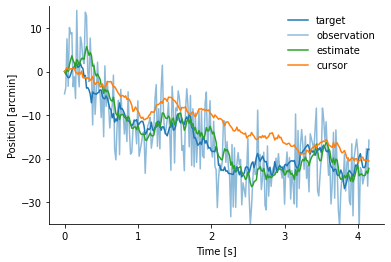

In [3]:
x, xhat, y, u = model.simulate(rng_key=random.PRNGKey(0), n=20, return_all=True)


t = jnp.arange(T) / 60.

f, ax = plt.subplots()
plt.plot(t, x[0,:,0], label="target")
plt.plot(t, y[0,:,0], label="observation", alpha=0.5, color="C0")
plt.plot(t, xhat[0,:,0], label="estimate", color="C2")
plt.plot(t, x[0,:,1], label="cursor", color="C1")
plt.xlabel("Time [s]")
plt.ylabel("Position [arcmin]")
plt.legend(frameon=False)
plt.ylim(-35, 15)

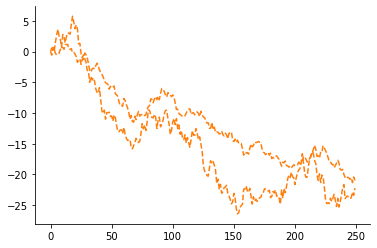

In [4]:
plt.plot(xhat[0,:,0], color="C1", linestyle="--")
plt.plot(xhat[0,:,1], color="C1", linestyle="--")


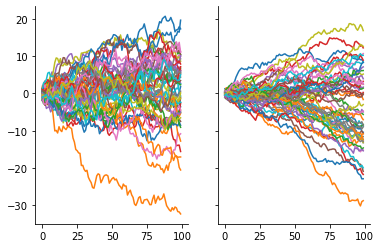

In [180]:
dt = 1. / 60.
T = 100
n = 10_000

key, subkey = random.split(random.PRNGKey(0))
x1 = jnp.cumsum(random.normal(subkey, shape=(T,n)), axis=0)

key, subkey = random.split(key)
v = jnp.cumsum(random.normal(subkey, shape=(T,n)), axis=0)
key, subkey = random.split(key)
x2 = jnp.cumsum(random.normal(subkey, shape=(T,n)) * 0.5 + v * dt, axis=0)

f, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(x1[:,:50])
ax[1].plot(x2[:,:50])
plt.show()